## Easy

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:

data = pd.read_pickle('train.pickle')
labels_names = pd.read_csv('label_names.csv')
X = data['features'].reshape(34799, 32*32*3) 
y = data['labels']

model = LogisticRegression(max_iter=100)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1_score(y_test, y_pred, average='weighted')


C:\Users\PavelAgafonov\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9253447814947738

0 [33  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
1 [  3 409  21   1   4   5   0   4   4   1   0   0   0   4   0   2   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0]
2 [  2  11 472   0   9  11   0   5   2   1   1   0   0   1   0   1   0   0
   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
3 [  0   1  10 289   1  21   2   2   1   3   1   0   0   2   0   3   1   0
   0   0   1   0   0   0   0   1   0   0   0   1   0   0   0   0   0   1
   0   0   0   0   0   0   1]
4 [  1   5  13   1 408   2   1   2   6   0   0   0   0   0   0   3   0   0
   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]
5 [  1   7  12   9   7 385   0  10   3   0   2   3   0   0   0   2   0   0
   1   0   0   0   0   1   0   3   0   0   1   0   0   0   1   0   0   0
   0  

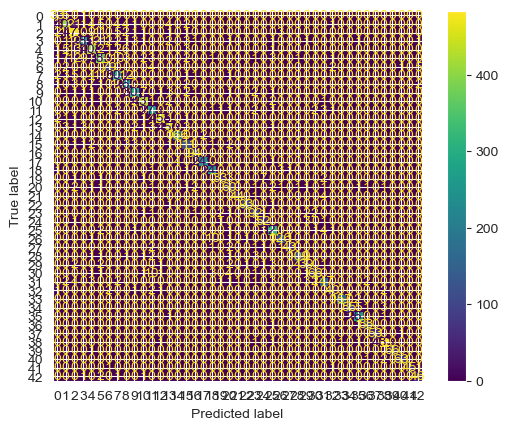

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

m = confusion_matrix(y_test, y_pred)
for i in range(43):
    print(i, m[i])
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [4]:
pd.read_csv('label_names.csv')

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Модель больше всего путает знаки ограничения скорости,могу предположить,что это из-за отличия лишь в числах на знаках.

## Medium
Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='weighted')


0.871317418589954

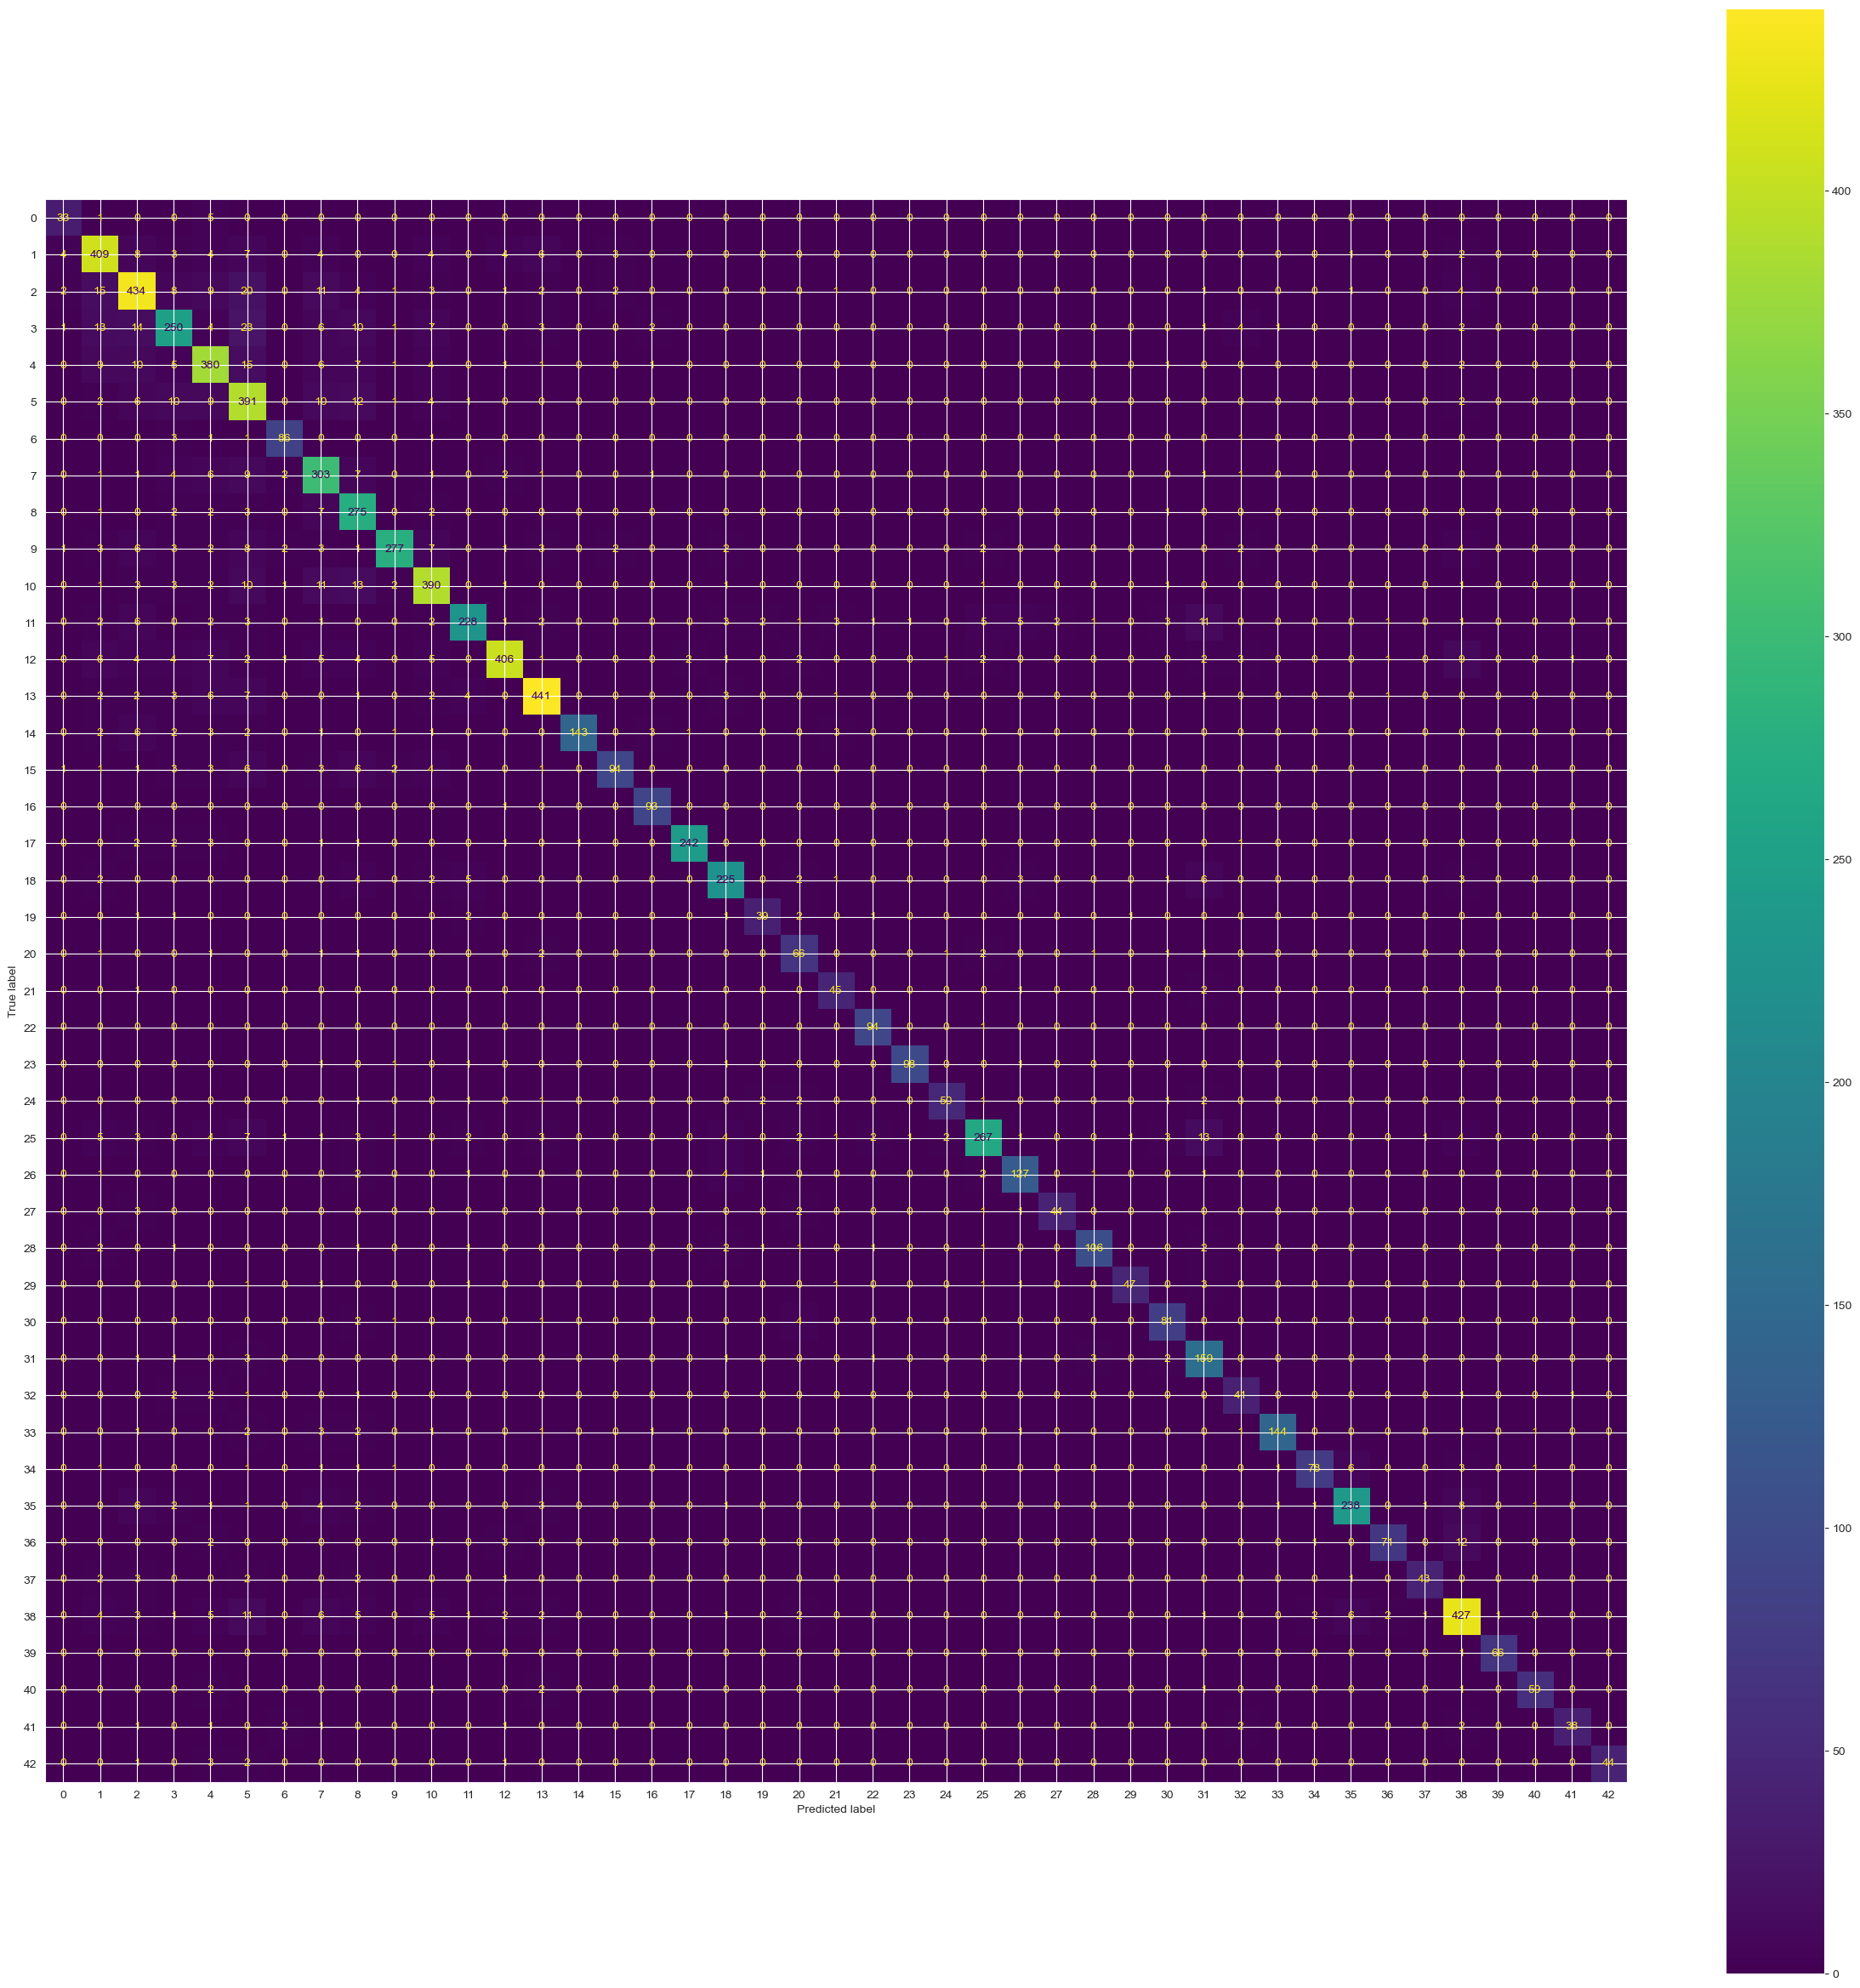

In [6]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

НБК

In [7]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.17442718695856854

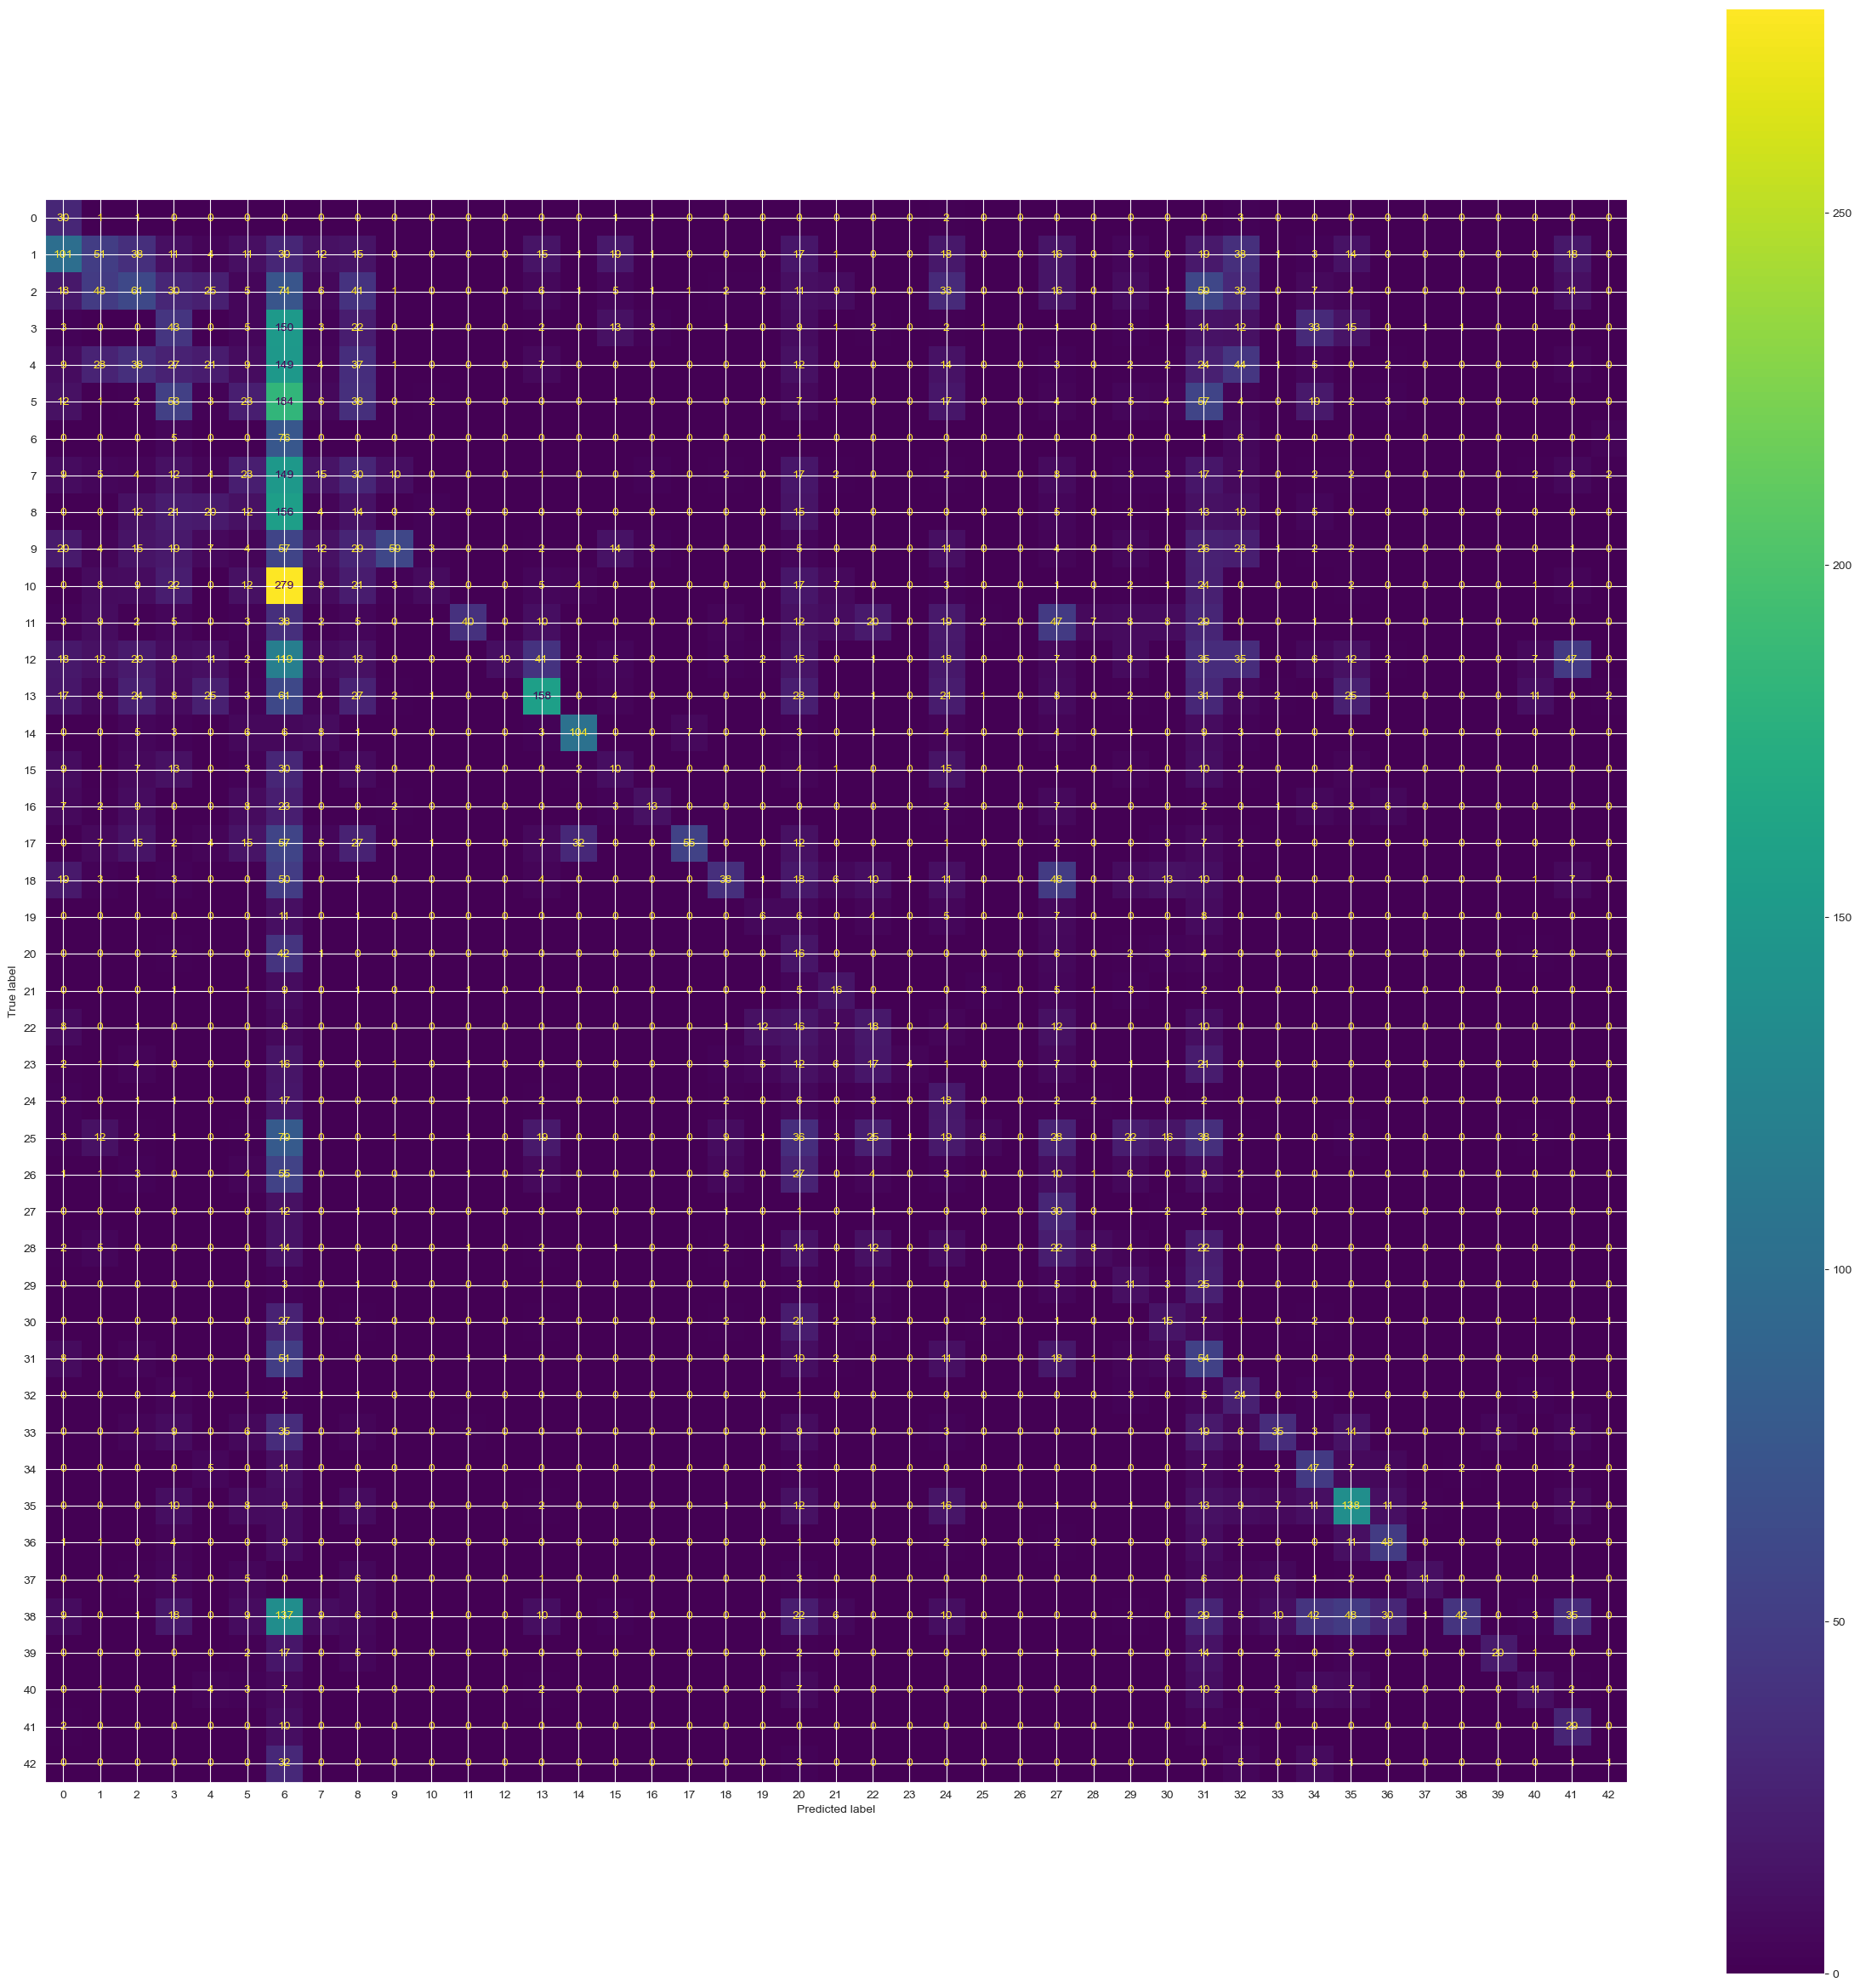

In [8]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

SVM

In [9]:
model1 = SVC(kernel='linear')
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.9565346118729047

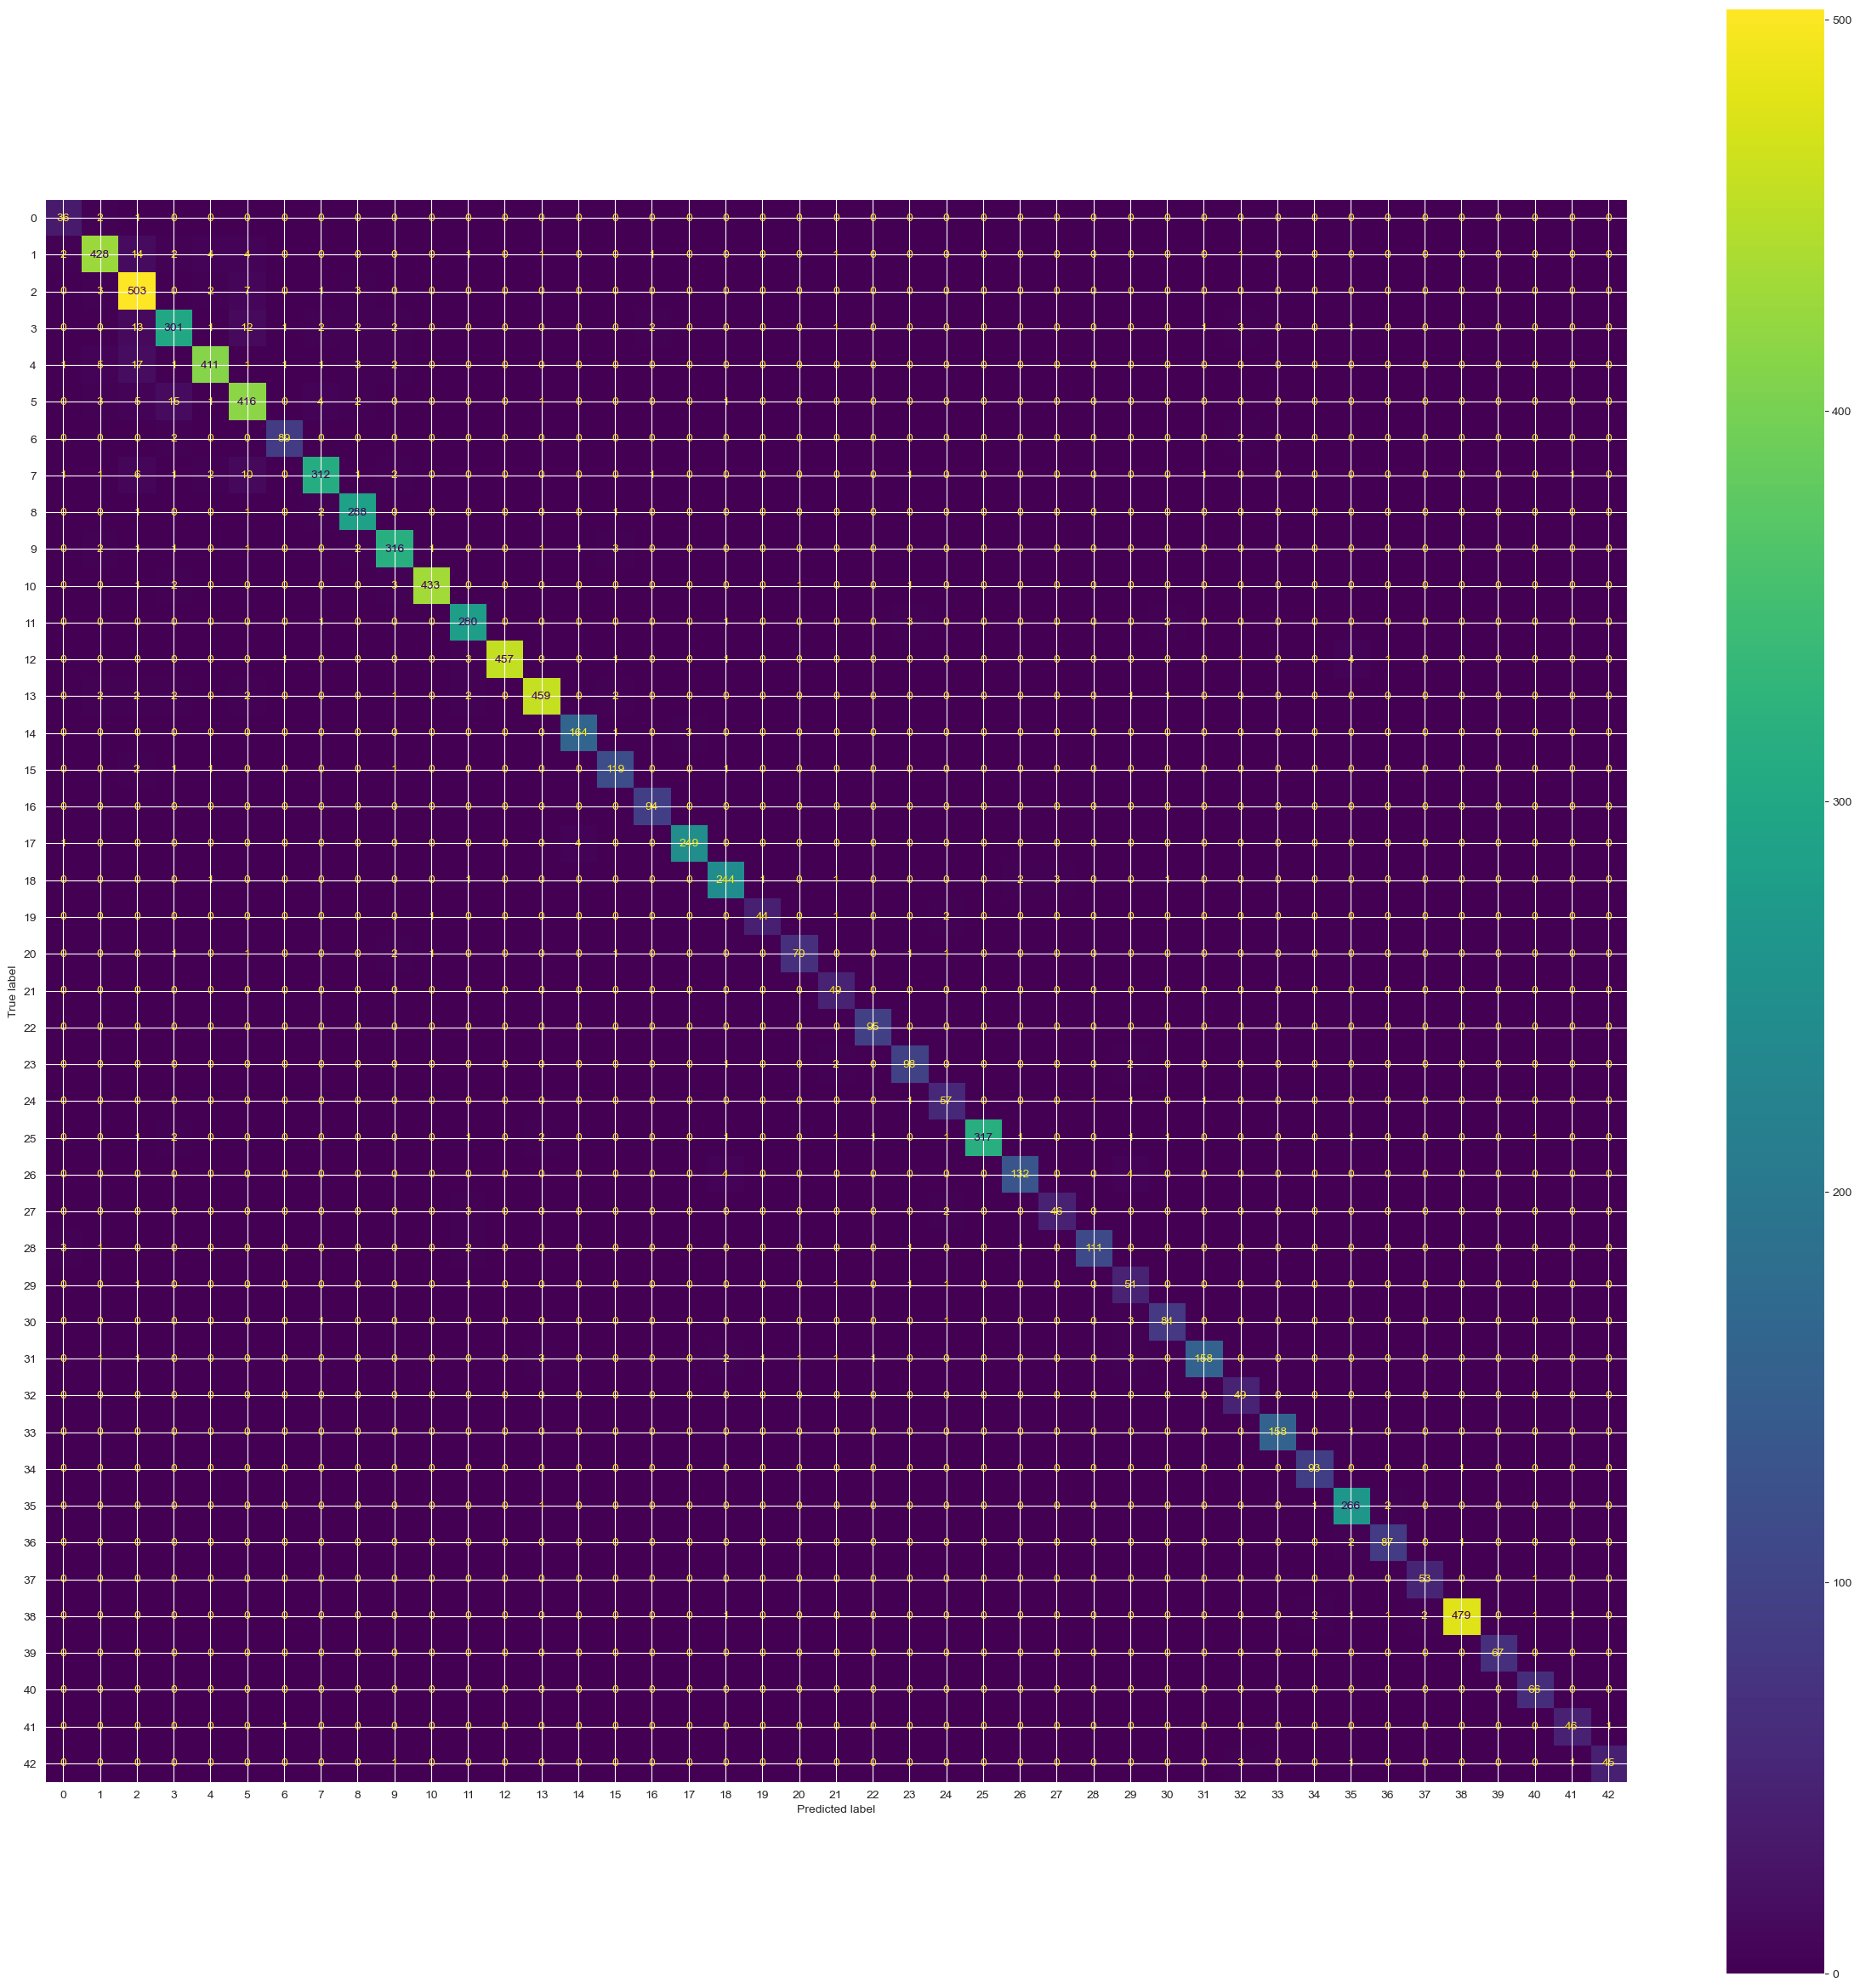

In [10]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [11]:
model2 = SVC(kernel='poly')
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.7432015754480998

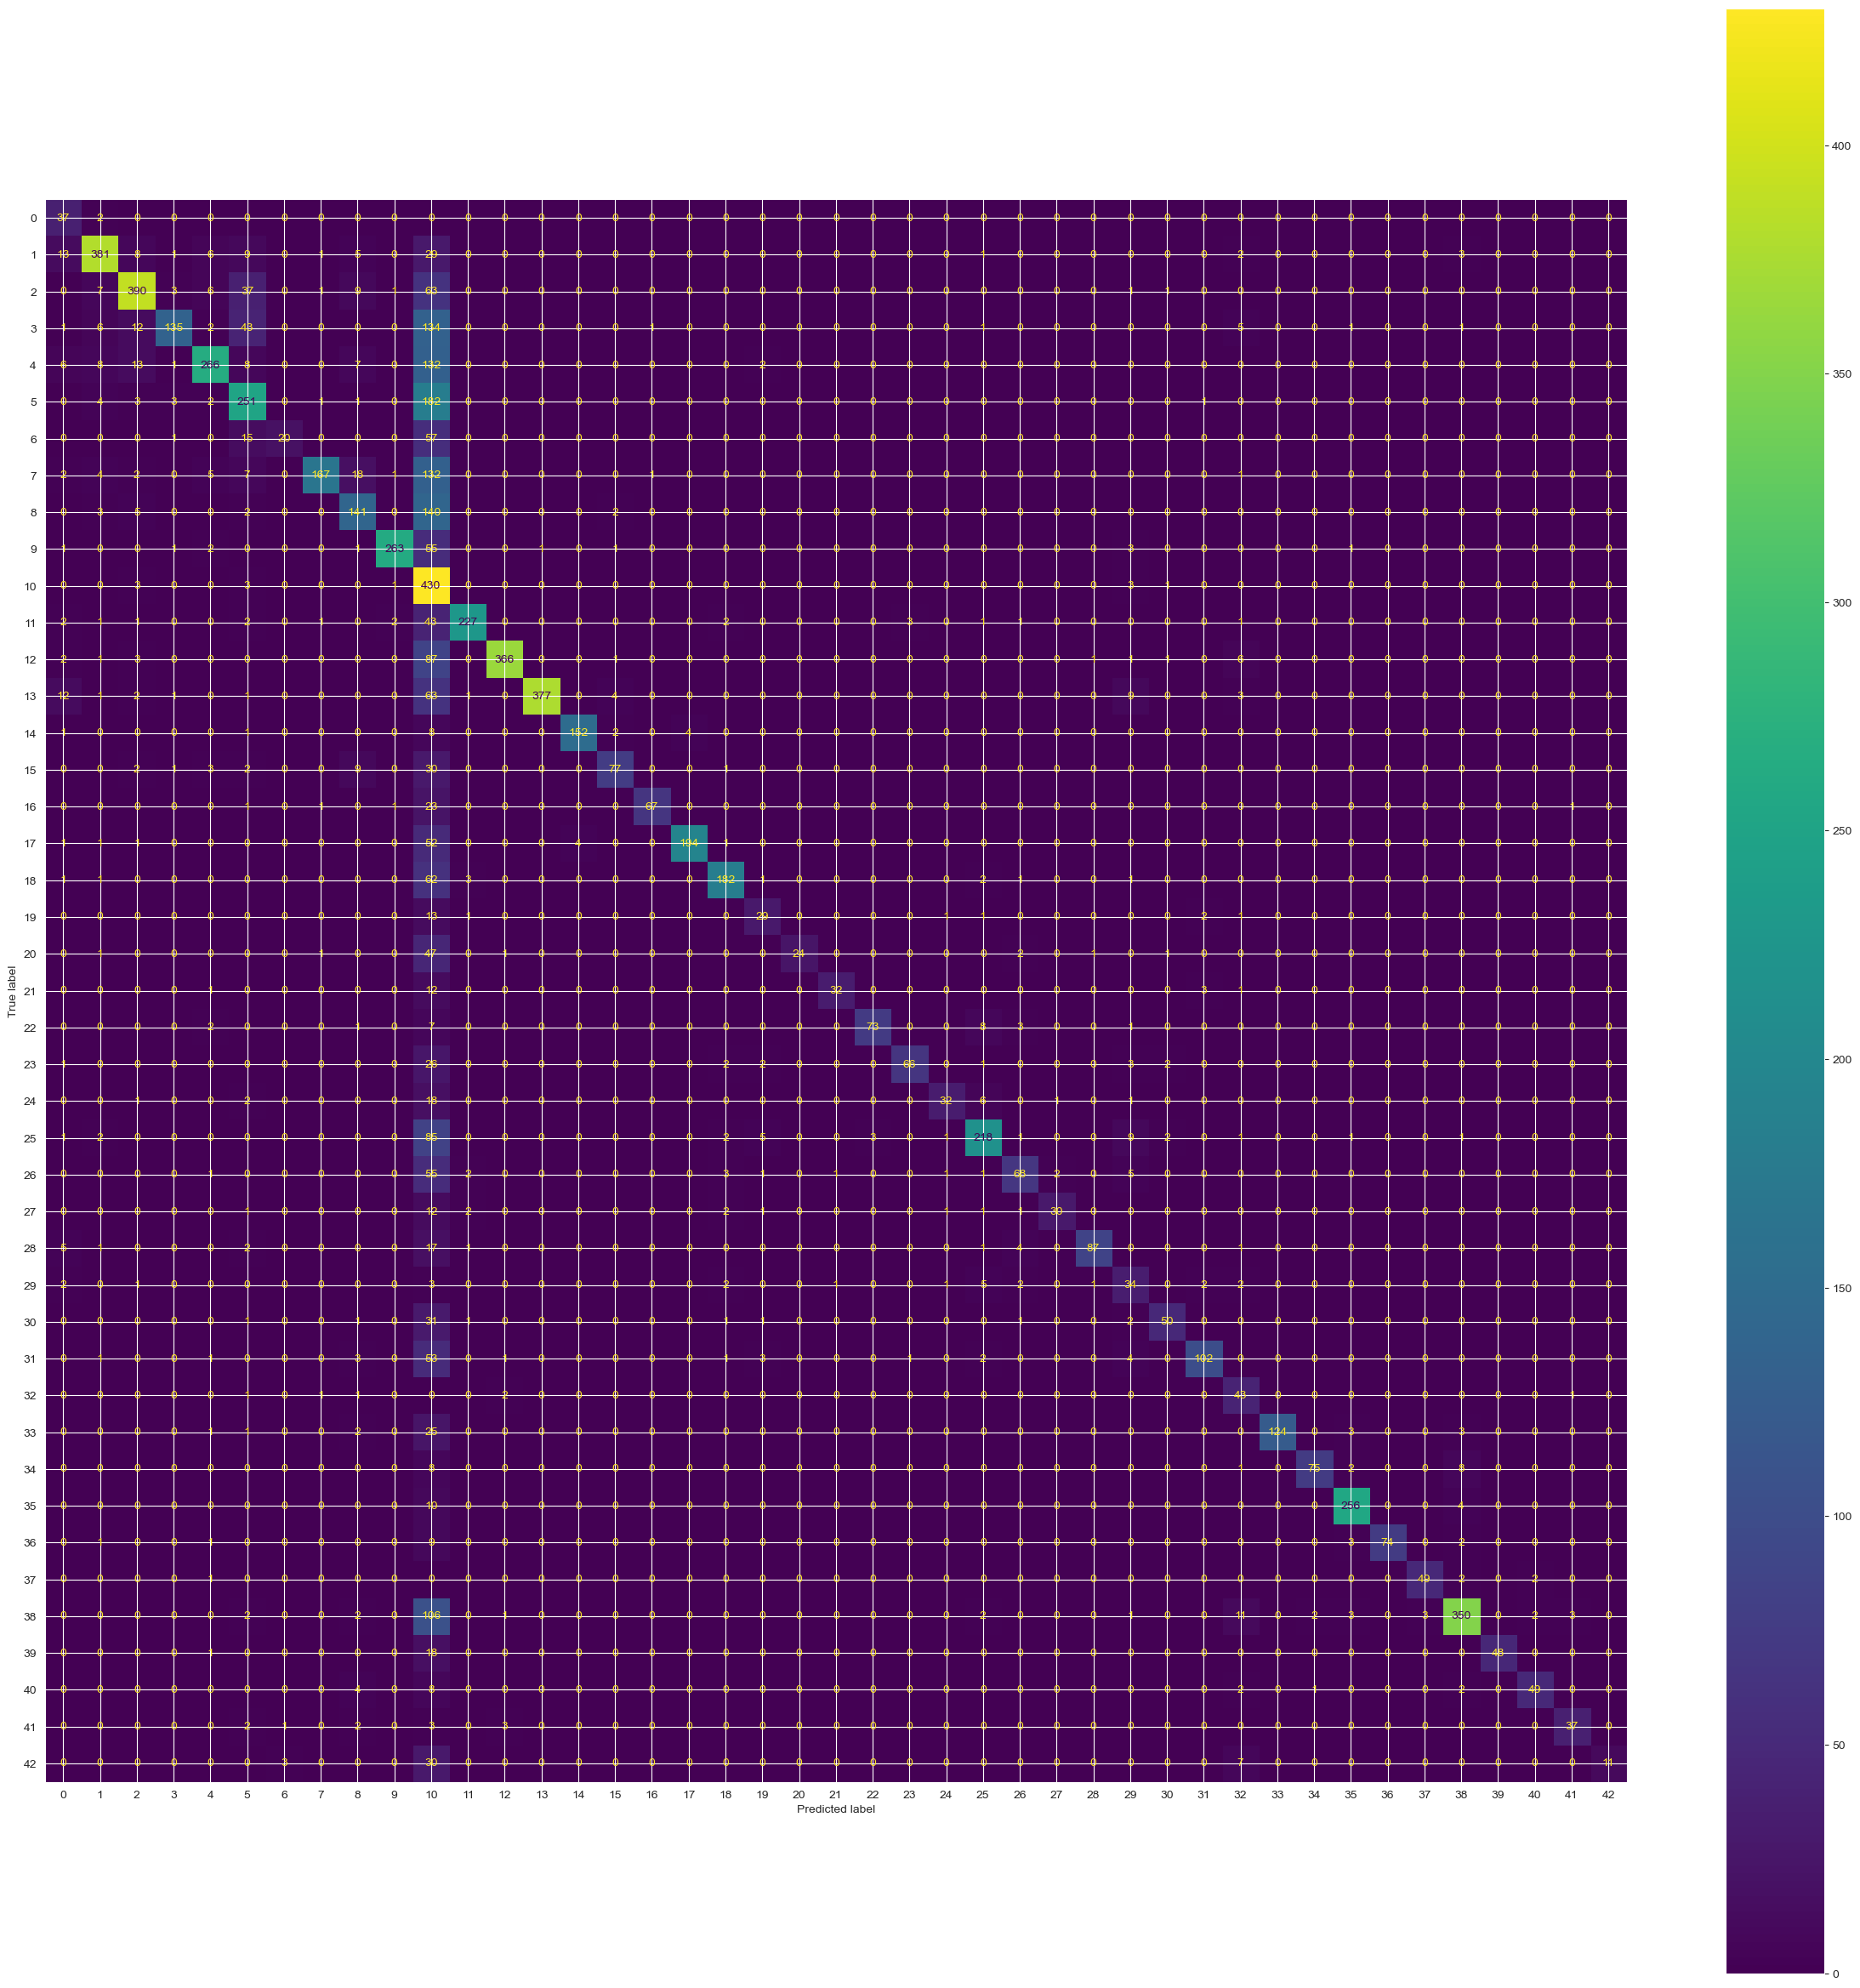

In [12]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [13]:
model3 = SVC(kernel='rbf')
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

f1_score(y_test, y_pred, average='weighted')

0.8717158858312513

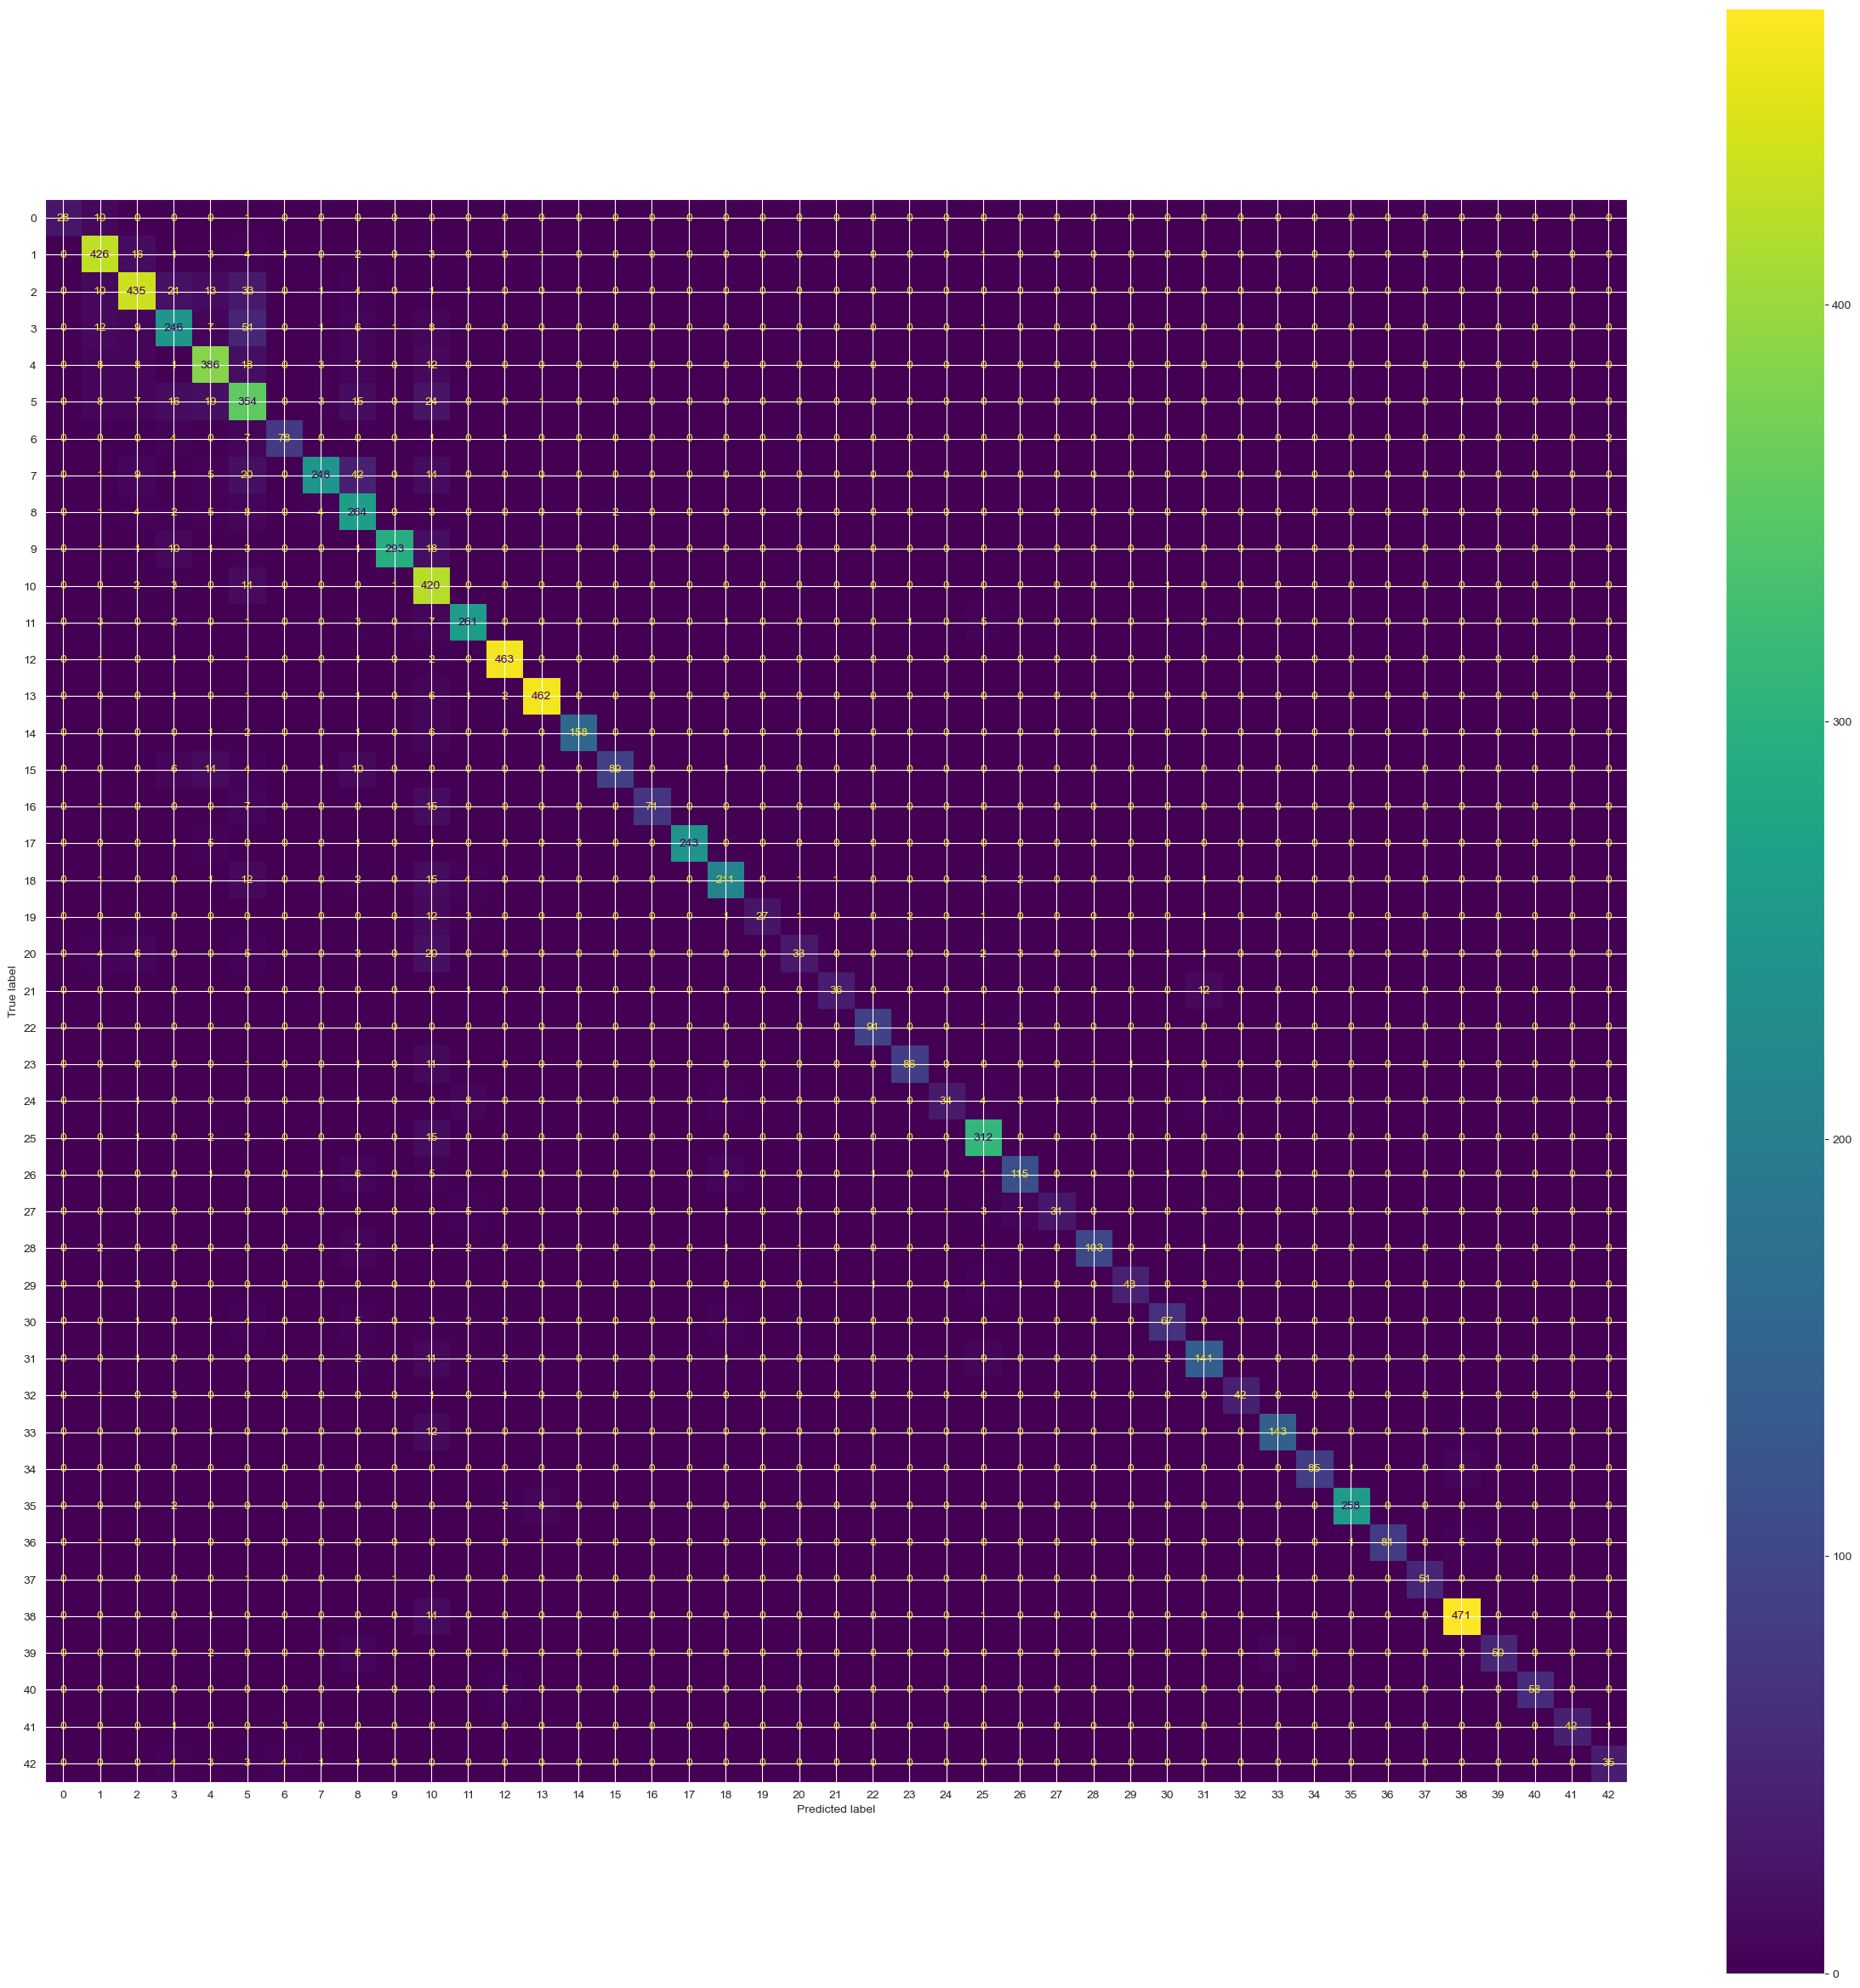

In [14]:
m = confusion_matrix(y_test, y_pred)
dp = ConfusionMatrixDisplay(m)
dp.plot()
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

RBF отработал хуже линейного ядра,можно предположить,что проблема в том,что знаки ограничения скорости плохо отличаются друг от друга. Полиномиальное ядро может просто переобучиться.
Проблема НБК,в том,что если фичи независимы,то он работает хорошо,но это не та задача)
И судя по всему, тут линейные зависимости между пикселями и целевой переменной
В целом, LogisticRegression отлично справлялся с задачей.
Еще любопытно, что poly часто путает правильные классы с 10 классом.